In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
import tensorflow as tf

In [2]:
df = pd.read_csv("data.csv")
df = df.rename(columns={"tension_strenght": "tensile_strength"})
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tensile_strength    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [4]:
for column in df.columns:
    print(str(column)+": "+str(df[column].unique()))
    print()

layer_height: [0.02 0.06 0.1  0.15 0.2 ]

wall_thickness: [ 8  7  1  4  6 10  5  9  2  3]

infill_density: [90 80 70 40 10 20 50 30 60]

infill_pattern: ['grid' 'honeycomb']

nozzle_temperature: [220 225 230 240 250 200 205 210 215]

bed_temperature: [60 65 70 75 80]

print_speed: [ 40  60 120]

material: ['abs' 'pla']

fan_speed: [  0  25  50  75 100]

roughness: [ 25  32  40  68  92  60  55  21  24  30  75 118 200 220 126 145  88  74
 120 144 265 312 368 180 176 128 138 121 168 154 225 289 326 192 212 172
 163 276 298 360 357 321 278 244]

tensile_strength: [18 16  8 10  5 24 12 14 27 25 37  9 23 26 33 29 19 11 34 13 22  4 35 28
 21 30]

elongation: [1.2 1.4 0.8 0.5 0.7 1.1 1.3 1.5 1.7 2.4 1.  2.2 1.9 1.6 2.1 2.  0.9 0.4
 1.8 2.9 0.6 2.8 2.3 3.3 3.1 2.7 3.2]



In [5]:
#In this data set, ABS and PLA assigned 0 and 1 values for materials (abs = 0, pla = 1)
df.material = [0 if each=='abs' else 1 for each in df.material]

#In this data set, grid and honeycomb assigned 0 and 1 values for infill_pattern (grid = 0, honeycomb = 1)
df.infill_pattern = [0 if each=='grid' else 1 for each in df.infill_pattern]

df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


In [6]:
df.layer_height = df.layer_height*100
df.elongation = df.elongation*100

In [10]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,2.0,8,90,0,220,60,40,0,0,25,18,120.0
1,2.0,7,90,1,225,65,40,0,25,32,16,140.0
2,2.0,1,80,0,230,70,40,0,50,40,8,80.0
3,2.0,4,70,1,240,75,40,0,75,68,10,50.0
4,2.0,6,90,0,250,80,40,0,100,92,5,70.0


In [11]:
target_cols = ['tensile_strength', 'roughness', 'elongation']
Y = df[target_cols]
X = df.drop(target_cols,axis=1)

In [12]:
selectedtodrop = ['infill_pattern', 'wall_thickness']
X_selected = X.drop(selectedtodrop, axis=1)
X_selected.head()

,layer_height,infill_density,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,2.0,90,220,60,40,0,0
1,2.0,90,225,65,40,0,25
2,2.0,80,230,70,40,0,50
3,2.0,70,240,75,40,0,75
4,2.0,90,250,80,40,0,100


In [13]:
dropnew = ['infill_pattern', 'wall_thickness']
dfnew = df.drop(dropnew, axis=1)
dfnew.head()

,layer_height,infill_density,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,2.0,90,220,60,40,0,0,25,18,120.0
1,2.0,90,225,65,40,0,25,32,16,140.0
2,2.0,80,230,70,40,0,50,40,8,80.0
3,2.0,70,240,75,40,0,75,68,10,50.0
4,2.0,90,250,80,40,0,100,92,5,70.0


In [14]:
X = X_selected.values
Y = Y.values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.09)
print(X_train.shape)
print(Y_test.shape)

(45, 7)
(5, 3)


In [16]:
# Construct a NN model using functional API
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Dropout, Activation, Flatten

inputvec = Input( shape=(7,) )
x = Dense( 16, activation='relu' )(inputvec)
x = Dense( 32, activation='relu' )(x)
x = Dense( 64, activation='relu' )(x)
#x = Dropout(0.5)(x)
x = Dense( 32, activation='relu' )(x)
x = Dense( 16, activation='relu' )(x)
x = Dense( 8, activation='relu' )(x)
#x = Dropout(0.25)(x)
preds = Dense(3, activation='linear' )(x)

model = Model(name= 'NN_model_2', inputs = inputvec,outputs=preds)
model.summary()

Model: "NN_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 1

In [17]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Epoch 1/1000
9/9 [==============================] - 0s 1ms/step - loss: 24985.4980 - accuracy: 0.3111
Epoch 2/1000
9/9 [==============================] - 0s 2ms/step - loss: 24663.3281 - accuracy: 0.6000
Epoch 3/1000
9/9 [==============================] - 0s 1ms/step - loss: 24637.1660 - accuracy: 0.6000
Epoch 4/1000
9/9 [==============================] - 0s 2ms/step - loss: 24591.4551 - accuracy: 0.6000
Epoch 5/1000
9/9 [==============================] - 0s 2ms/step - loss: 24525.6719 - accuracy: 0.6000
Epoch 6/1000
9/9 [==============================] - 0s 2ms/step - loss: 24332.0000 - accuracy: 0.6000
Epoch 7/1000
9/9 [==============================] - 0s 1ms/step - loss: 24031.2617 - accuracy: 0.6000
Epoch 8/1000
9/9 [==============================] - 0s 1ms/step - loss: 23322.5840 - accuracy: 0.6000
Epoch 9/1000
9/9 [==============================] - 0s 2ms/step - loss: 22133.9453 - accuracy: 0.6000
Epoch 10/1000
9/9 [==============================] - 0s 2ms/step - loss: 20100.875

9/9 [==============================] - 0s 1ms/step - loss: 2305.5168 - accuracy: 0.6667
Epoch 82/1000
9/9 [==============================] - 0s 1ms/step - loss: 2478.5068 - accuracy: 0.6000
Epoch 83/1000
9/9 [==============================] - 0s 1ms/step - loss: 2389.6377 - accuracy: 0.6667
Epoch 84/1000
9/9 [==============================] - 0s 1ms/step - loss: 2370.3008 - accuracy: 0.6444
Epoch 85/1000
9/9 [==============================] - 0s 1ms/step - loss: 2393.1978 - accuracy: 0.6667
Epoch 86/1000
9/9 [==============================] - 0s 1ms/step - loss: 2343.0090 - accuracy: 0.6444
Epoch 87/1000
9/9 [==============================] - 0s 1ms/step - loss: 2280.6038 - accuracy: 0.6222
Epoch 88/1000
9/9 [==============================] - 0s 1ms/step - loss: 2246.9739 - accuracy: 0.6889
Epoch 89/1000
9/9 [==============================] - 0s 1ms/step - loss: 2255.5483 - accuracy: 0.6444
Epoch 90/1000
9/9 [==============================] - 0s 1ms/step - loss: 2186.4141 - accuracy: 0

9/9 [==============================] - 0s 1ms/step - loss: 1982.9836 - accuracy: 0.6667
Epoch 161/1000
9/9 [==============================] - 0s 1ms/step - loss: 1865.1677 - accuracy: 0.6667
Epoch 162/1000
9/9 [==============================] - 0s 1ms/step - loss: 1821.1077 - accuracy: 0.6444
Epoch 163/1000
9/9 [==============================] - 0s 1ms/step - loss: 1848.1608 - accuracy: 0.6667
Epoch 164/1000
9/9 [==============================] - 0s 1ms/step - loss: 1776.8103 - accuracy: 0.6444
Epoch 165/1000
9/9 [==============================] - 0s 1ms/step - loss: 1898.2167 - accuracy: 0.6667
Epoch 166/1000
9/9 [==============================] - 0s 1ms/step - loss: 1785.9606 - accuracy: 0.6889
Epoch 167/1000
9/9 [==============================] - 0s 997us/step - loss: 1755.1061 - accuracy: 0.6444
Epoch 168/1000
9/9 [==============================] - 0s 1ms/step - loss: 1747.7415 - accuracy: 0.6444
Epoch 169/1000
9/9 [==============================] - 0s 1ms/step - loss: 1779.2229 - 

9/9 [==============================] - 0s 1ms/step - loss: 890.6212 - accuracy: 0.8222
Epoch 240/1000
9/9 [==============================] - 0s 1ms/step - loss: 976.5641 - accuracy: 0.7111
Epoch 241/1000
9/9 [==============================] - 0s 1ms/step - loss: 1049.8849 - accuracy: 0.8222
Epoch 242/1000
9/9 [==============================] - 0s 1ms/step - loss: 1501.5477 - accuracy: 0.7556
Epoch 243/1000
9/9 [==============================] - 0s 1ms/step - loss: 1039.3690 - accuracy: 0.7556
Epoch 244/1000
9/9 [==============================] - 0s 1ms/step - loss: 1283.0624 - accuracy: 0.7333
Epoch 245/1000
9/9 [==============================] - 0s 1ms/step - loss: 974.8166 - accuracy: 0.7111
Epoch 246/1000
9/9 [==============================] - 0s 1ms/step - loss: 841.4454 - accuracy: 0.8000
Epoch 247/1000
9/9 [==============================] - 0s 1ms/step - loss: 877.9356 - accuracy: 0.7111
Epoch 248/1000
9/9 [==============================] - 0s 1ms/step - loss: 815.1285 - accuracy

9/9 [==============================] - 0s 1ms/step - loss: 372.4816 - accuracy: 0.8889
Epoch 320/1000
9/9 [==============================] - 0s 2ms/step - loss: 371.9937 - accuracy: 0.8667
Epoch 321/1000
9/9 [==============================] - 0s 1ms/step - loss: 362.7180 - accuracy: 0.8667
Epoch 322/1000
9/9 [==============================] - 0s 1ms/step - loss: 335.9642 - accuracy: 0.8444
Epoch 323/1000
9/9 [==============================] - 0s 1ms/step - loss: 294.8084 - accuracy: 0.8667
Epoch 324/1000
9/9 [==============================] - 0s 1ms/step - loss: 283.7455 - accuracy: 0.8889
Epoch 325/1000
9/9 [==============================] - 0s 1ms/step - loss: 298.1981 - accuracy: 0.9111
Epoch 326/1000
9/9 [==============================] - 0s 1ms/step - loss: 338.7993 - accuracy: 0.9333
Epoch 327/1000
9/9 [==============================] - 0s 1ms/step - loss: 341.9671 - accuracy: 0.9111
Epoch 328/1000
9/9 [==============================] - 0s 1ms/step - loss: 361.9202 - accuracy: 0.

9/9 [==============================] - 0s 1ms/step - loss: 145.7372 - accuracy: 0.9778
Epoch 400/1000
9/9 [==============================] - 0s 1ms/step - loss: 138.8217 - accuracy: 0.9778
Epoch 401/1000
9/9 [==============================] - 0s 2ms/step - loss: 132.1812 - accuracy: 0.9778
Epoch 402/1000
9/9 [==============================] - 0s 1ms/step - loss: 181.3428 - accuracy: 0.9778
Epoch 403/1000
9/9 [==============================] - 0s 1ms/step - loss: 202.2176 - accuracy: 0.9778
Epoch 404/1000
9/9 [==============================] - 0s 1ms/step - loss: 175.3371 - accuracy: 0.9111
Epoch 405/1000
9/9 [==============================] - 0s 1ms/step - loss: 138.8744 - accuracy: 0.9556
Epoch 406/1000
9/9 [==============================] - 0s 1ms/step - loss: 127.9631 - accuracy: 1.0000
Epoch 407/1000
9/9 [==============================] - 0s 2ms/step - loss: 129.9986 - accuracy: 0.9778
Epoch 408/1000
9/9 [==============================] - 0s 1ms/step - loss: 131.9782 - accuracy: 0.

9/9 [==============================] - 0s 1ms/step - loss: 83.5204 - accuracy: 1.0000
Epoch 480/1000
9/9 [==============================] - 0s 1ms/step - loss: 87.9595 - accuracy: 1.0000
Epoch 481/1000
9/9 [==============================] - 0s 1ms/step - loss: 81.2371 - accuracy: 1.0000
Epoch 482/1000
9/9 [==============================] - 0s 1ms/step - loss: 97.1861 - accuracy: 1.0000
Epoch 483/1000
9/9 [==============================] - 0s 1ms/step - loss: 91.3900 - accuracy: 1.0000
Epoch 484/1000
9/9 [==============================] - 0s 1ms/step - loss: 91.2823 - accuracy: 1.0000
Epoch 485/1000
9/9 [==============================] - 0s 1ms/step - loss: 114.4925 - accuracy: 1.0000
Epoch 486/1000
9/9 [==============================] - 0s 1ms/step - loss: 93.6876 - accuracy: 1.0000
Epoch 487/1000
9/9 [==============================] - 0s 1ms/step - loss: 92.3172 - accuracy: 1.0000
Epoch 488/1000
9/9 [==============================] - 0s 1ms/step - loss: 90.4048 - accuracy: 1.0000
Epoc

9/9 [==============================] - 0s 1ms/step - loss: 97.1619 - accuracy: 0.9778
Epoch 561/1000
9/9 [==============================] - 0s 1ms/step - loss: 107.7138 - accuracy: 0.9778
Epoch 562/1000
9/9 [==============================] - 0s 1ms/step - loss: 60.5210 - accuracy: 1.0000
Epoch 563/1000
9/9 [==============================] - 0s 1ms/step - loss: 65.6712 - accuracy: 1.0000
Epoch 564/1000
9/9 [==============================] - 0s 1ms/step - loss: 65.4031 - accuracy: 1.0000
Epoch 565/1000
9/9 [==============================] - 0s 1ms/step - loss: 64.8539 - accuracy: 1.0000
Epoch 566/1000
9/9 [==============================] - 0s 1ms/step - loss: 60.6005 - accuracy: 1.0000
Epoch 567/1000
9/9 [==============================] - 0s 1ms/step - loss: 59.5214 - accuracy: 1.0000
Epoch 568/1000
9/9 [==============================] - 0s 1ms/step - loss: 62.6694 - accuracy: 1.0000
Epoch 569/1000
9/9 [==============================] - 0s 1ms/step - loss: 58.6256 - accuracy: 1.0000
Epoc

9/9 [==============================] - 0s 1ms/step - loss: 54.6202 - accuracy: 1.0000
Epoch 642/1000
9/9 [==============================] - 0s 1ms/step - loss: 53.8300 - accuracy: 1.0000
Epoch 643/1000
9/9 [==============================] - 0s 1ms/step - loss: 46.0844 - accuracy: 1.0000
Epoch 644/1000
9/9 [==============================] - 0s 1ms/step - loss: 49.4933 - accuracy: 1.0000
Epoch 645/1000
9/9 [==============================] - 0s 1ms/step - loss: 49.6716 - accuracy: 1.0000
Epoch 646/1000
9/9 [==============================] - 0s 1ms/step - loss: 53.3830 - accuracy: 1.0000
Epoch 647/1000
9/9 [==============================] - 0s 1ms/step - loss: 52.0957 - accuracy: 1.0000
Epoch 648/1000
9/9 [==============================] - 0s 1ms/step - loss: 65.5369 - accuracy: 0.9778
Epoch 649/1000
9/9 [==============================] - 0s 1ms/step - loss: 82.2266 - accuracy: 0.9778
Epoch 650/1000
9/9 [==============================] - 0s 1ms/step - loss: 61.6597 - accuracy: 1.0000
Epoch

9/9 [==============================] - 0s 1ms/step - loss: 44.9471 - accuracy: 1.0000
Epoch 723/1000
9/9 [==============================] - 0s 2ms/step - loss: 58.6249 - accuracy: 1.0000
Epoch 724/1000
9/9 [==============================] - 0s 2ms/step - loss: 49.1513 - accuracy: 1.0000
Epoch 725/1000
9/9 [==============================] - 0s 1ms/step - loss: 51.2928 - accuracy: 1.0000
Epoch 726/1000
9/9 [==============================] - 0s 1ms/step - loss: 56.1560 - accuracy: 1.0000
Epoch 727/1000
9/9 [==============================] - 0s 1ms/step - loss: 55.6481 - accuracy: 1.0000
Epoch 728/1000
9/9 [==============================] - 0s 1ms/step - loss: 48.4559 - accuracy: 1.0000
Epoch 729/1000
9/9 [==============================] - 0s 1ms/step - loss: 51.5432 - accuracy: 1.0000
Epoch 730/1000
9/9 [==============================] - 0s 1ms/step - loss: 65.5581 - accuracy: 1.0000
Epoch 731/1000
9/9 [==============================] - 0s 2ms/step - loss: 42.1764 - accuracy: 1.0000
Epoch

9/9 [==============================] - 0s 1ms/step - loss: 33.1209 - accuracy: 1.0000
Epoch 804/1000
9/9 [==============================] - 0s 1ms/step - loss: 39.4362 - accuracy: 1.0000
Epoch 805/1000
9/9 [==============================] - 0s 1ms/step - loss: 32.0883 - accuracy: 1.0000
Epoch 806/1000
9/9 [==============================] - 0s 1ms/step - loss: 32.5962 - accuracy: 1.0000
Epoch 807/1000
9/9 [==============================] - 0s 1ms/step - loss: 36.7045 - accuracy: 1.0000
Epoch 808/1000
9/9 [==============================] - 0s 1ms/step - loss: 28.4984 - accuracy: 1.0000
Epoch 809/1000
9/9 [==============================] - 0s 1ms/step - loss: 30.8368 - accuracy: 1.0000
Epoch 810/1000
9/9 [==============================] - 0s 1ms/step - loss: 30.4958 - accuracy: 1.0000
Epoch 811/1000
9/9 [==============================] - 0s 1ms/step - loss: 31.2180 - accuracy: 1.0000
Epoch 812/1000
9/9 [==============================] - 0s 1ms/step - loss: 39.4079 - accuracy: 1.0000
Epoch

9/9 [==============================] - 0s 1ms/step - loss: 29.6429 - accuracy: 1.0000
Epoch 885/1000
9/9 [==============================] - 0s 1ms/step - loss: 29.0170 - accuracy: 1.0000
Epoch 886/1000
9/9 [==============================] - 0s 1ms/step - loss: 27.7733 - accuracy: 1.0000
Epoch 887/1000
9/9 [==============================] - 0s 1ms/step - loss: 25.3026 - accuracy: 1.0000
Epoch 888/1000
9/9 [==============================] - 0s 2ms/step - loss: 27.3694 - accuracy: 1.0000
Epoch 889/1000
9/9 [==============================] - 0s 2ms/step - loss: 25.6343 - accuracy: 1.0000
Epoch 890/1000
9/9 [==============================] - 0s 2ms/step - loss: 29.7303 - accuracy: 1.0000
Epoch 891/1000
9/9 [==============================] - 0s 1ms/step - loss: 28.6083 - accuracy: 1.0000
Epoch 892/1000
9/9 [==============================] - 0s 1ms/step - loss: 21.6333 - accuracy: 1.0000
Epoch 893/1000
9/9 [==============================] - 0s 1ms/step - loss: 21.1989 - accuracy: 1.0000
Epoch

9/9 [==============================] - 0s 1ms/step - loss: 26.0029 - accuracy: 1.0000
Epoch 966/1000
9/9 [==============================] - 0s 1ms/step - loss: 24.2085 - accuracy: 1.0000
Epoch 967/1000
9/9 [==============================] - 0s 1ms/step - loss: 29.0903 - accuracy: 1.0000
Epoch 968/1000
9/9 [==============================] - 0s 1ms/step - loss: 32.6424 - accuracy: 1.0000
Epoch 969/1000
9/9 [==============================] - 0s 1ms/step - loss: 28.0220 - accuracy: 1.0000
Epoch 970/1000
9/9 [==============================] - 0s 1ms/step - loss: 27.0706 - accuracy: 1.0000
Epoch 971/1000
9/9 [==============================] - 0s 1ms/step - loss: 28.4095 - accuracy: 1.0000
Epoch 972/1000
9/9 [==============================] - 0s 1ms/step - loss: 18.8795 - accuracy: 1.0000
Epoch 973/1000
9/9 [==============================] - 0s 1ms/step - loss: 19.5467 - accuracy: 1.0000
Epoch 974/1000
9/9 [==============================] - 0s 1ms/step - loss: 18.7776 - accuracy: 1.0000
Epoch

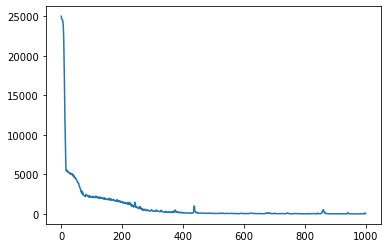

In [18]:
# Fit model to the data (train the model)
from keras.callbacks import History
history = History()

model.fit(X_train, Y_train, batch_size=5, epochs=1000, verbose=1, callbacks=[history])
# Batch size = 50 (all samples), epoch number = 10000 (the learning algorithm works through the entire dataset for 10000 times)
print('Done!')

# Plot the loss history
plt.plot(history.history['loss'])

Text(0, 0.5, 'mean squared error')

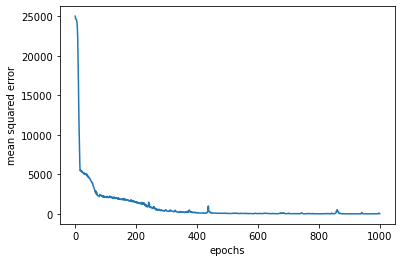

In [19]:
plt.plot(history.history['loss'],)
plt.xlabel("epochs")
plt.ylabel("mean squared error")

1/1 [==============================] - 0s 117ms/step - loss: 1500.3054 - accuracy: 0.8000
[1500.305419921875, 0.800000011920929]


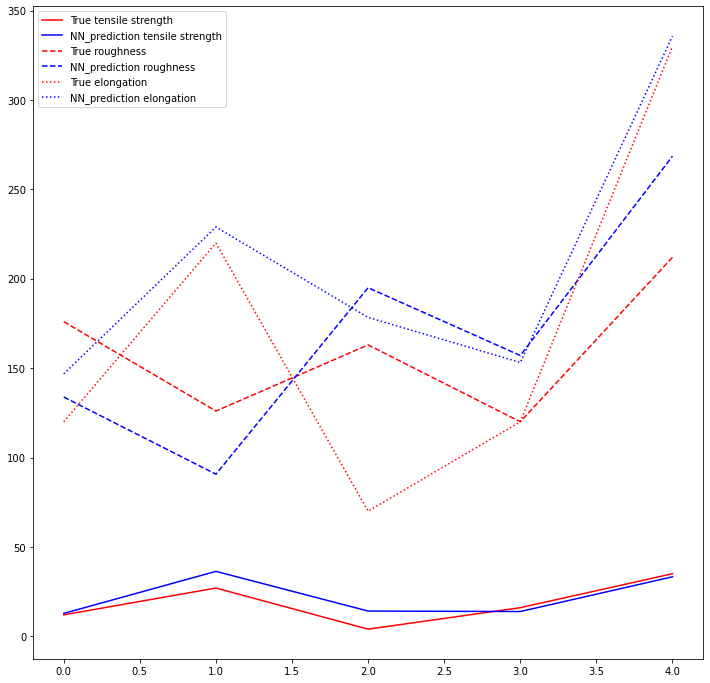

In [20]:
# Evaluate the accuracy of the model (loss: mean squared error, as defined in the step of compiling)
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

# Batch prediction & plot
Y_pred = model.predict(X_test)


plt.show()
plt.figure(figsize=(12, 12))
line1, = plt.plot(Y_test[:,0],'r-')
line2, = plt.plot(Y_pred[:,0],'b-')
line3, = plt.plot(Y_test[:,1],'r--')
line4, = plt.plot(Y_pred[:,1],'b--')
line5, = plt.plot(Y_test[:,2],'r:')
line6, = plt.plot(Y_pred[:,2],'b:')
plt.legend([line1, line2, line3, line4, line5, line6], ['True tensile strength', 'NN_prediction tensile strength', 'True roughness', 'NN_prediction roughness', 'True elongation', 'NN_prediction elongation'])